<a href="https://colab.research.google.com/github/chieuanh2910/chill/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF "Anh_Nguyen_MIS780A2_Task1"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
[NbConvertApp] Converting notebook Anh_Nguyen_MIS780A2_Task1.ipynb to PDF
[NbConvertApp] Support files will be in Anh_Nguyen_MIS780A2_Task1_files/
[NbConvertApp] Making directory ./Anh_Nguyen_MIS780A2_Task1_files
[NbConvertApp] Making directory ./Anh_Nguyen_MIS780A2_Task1_files
[NbConvertApp] Making directory ./Anh_Nguyen_MIS780A2_Task1_files
[NbConvertApp] Making directory ./Anh_Nguyen_MIS780A2_Task1_files
[NbConvertApp] Making directory ./Anh_Nguyen_MIS780A2_Task1_files
[NbConvertApp] Making directory ./Anh_Nguyen_MIS780A2_Task1_files
[NbConvertApp] Making directory ./Anh_Nguyen_MIS78



## Task 1: – Real estate analytics with tabular data

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

This analysis provides an overview of the analysis conducted on a dataset comprising over 21,613 house sales in King County, USA. The objectives are to explore the dataset and evaluate various models for predicting house prices under two distinct scenarios: regression and classification with neural network models. The ultimate goal of the analysis is to predict house prices if there is a property in the market, which in turn will be beneficial to real eastate companies. The companies could utilize the proposed models to make decision in buying or selling properties for living or commercial purposes, or they could use the information to give advice for their customers  who wish to purchase or sell their houses.   

**Scenario A: Regression Model Evaluation**

In the first scenario, two regression models - linear regression and neural networks - are used to predict the house prices. The structure of this scenario include Data Preprocessing and Predictive Modelling sections.
* Data Preprocessing

The dataset is found to be highly right-skewed; thus, it is log-transformed in an attempt to return to normal distribution before feeding into the models. The dataset then is splitting into training and validation sets (70:30 ratio). Finally, it will be normalized to the range 0-1 for better model convergence.
* Predictive Modelling  

A linear regression and a neural network are employed to compare their prediction power for the house prices. The metrics used for performance evaluation include Mean Square Error, Mean Absolute Error, and correlation betwen predicted and true values.  

Findings:

Linear Regression: The linear regression model demonstrated a reasonably good performance in predicting house prices. It is interpretable, easy to implement, and provides a baseline for comparison.

Neural Networks: The neural network model has higher predictive capabilities as it can capture non-linear relationships within the dataset.

**Scenario B: Classification Model Evaluation**

The structure for the second scenario also include , Data Preprocessing and Predictive Modelling sections.
* Data Preprocessing

The dataset will go through same data processing steps in scenario A. However,
the house price attribute is transformed into a nominal variable, categorizing houses as "High Price" (for prices of $450,000 or more) and "Low Price" (for prices less than $450,000).

* Predictive Modelling  

Two classification models are employed: random forest and neural networks to test out their performance. The metrics used for performance evaluation include Mean Square Error, Mean Absolute Error, and correlation betwen predicted and true values.  

Findings:

Neural Networks: The neural network classification model displayed commendable classification performance. However, the Random Forest model proves to be better in performance as it is not affected by outliers.  


In summary, this analysis determined that for predicting house prices, a neural network regression model outperforms linear regression due to its ability to handle complex relationships. In the classification scenario, a neural network classification model is lesser in performance to Random Forest as it is subjected to outliers. Nonetheless, it is highely believed that by further optimizing the neural network model, it can be a long-term feasible solution for business in house price prediction or classification.  

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing A

In [ ]:
#Import libraries
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import skew

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load dataset, using 'id' as index
df1 = pd.read_csv('/content/drive/MyDrive/A2_Datasets/Part1_house_price.csv')
df1.set_index('id', inplace=True)

In [ ]:
#Set display of the dataframe to display all columns and rows without any truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

After loading the dataset, it is found out that the dataset contains 21613 rows and 20 columns with no null values. Except 'date' column, the datatype of the rest of columns are in numerical.   

In [ ]:
#Sum all null values
df1.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

The 'price' column will be selected to be the label for the first task which is the comparison between two regression models. Based on the below description table, the highest price is 7,700,000 (7.700000e+06) and the lowest one is 75,000 ( 7.500000e+04	). On average, house prices are at 540,182.2. There are no unique nor frequently occurence price point.    	  

In [ ]:
df1.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,NaN,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


The distibution of data in price column is highly right-skewed; thus, it can be concluded that it is not from normal distribution and would need transformation before running the models.

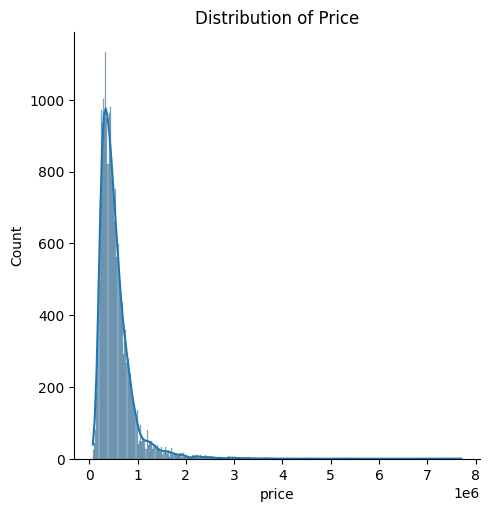

In [ ]:
#Create a chart for to see data distriibution of price
sns.displot(df1['price'],kde=True)
plt.title("Distribution of Price")
plt.show()


The below scatterplt charts visualize the relationship of other attributes and the label.  The selected attributes are: bedrooms, bathrooms, sqft_living, sqft_living, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15. They are under the assumption to have prediction power towards the label.

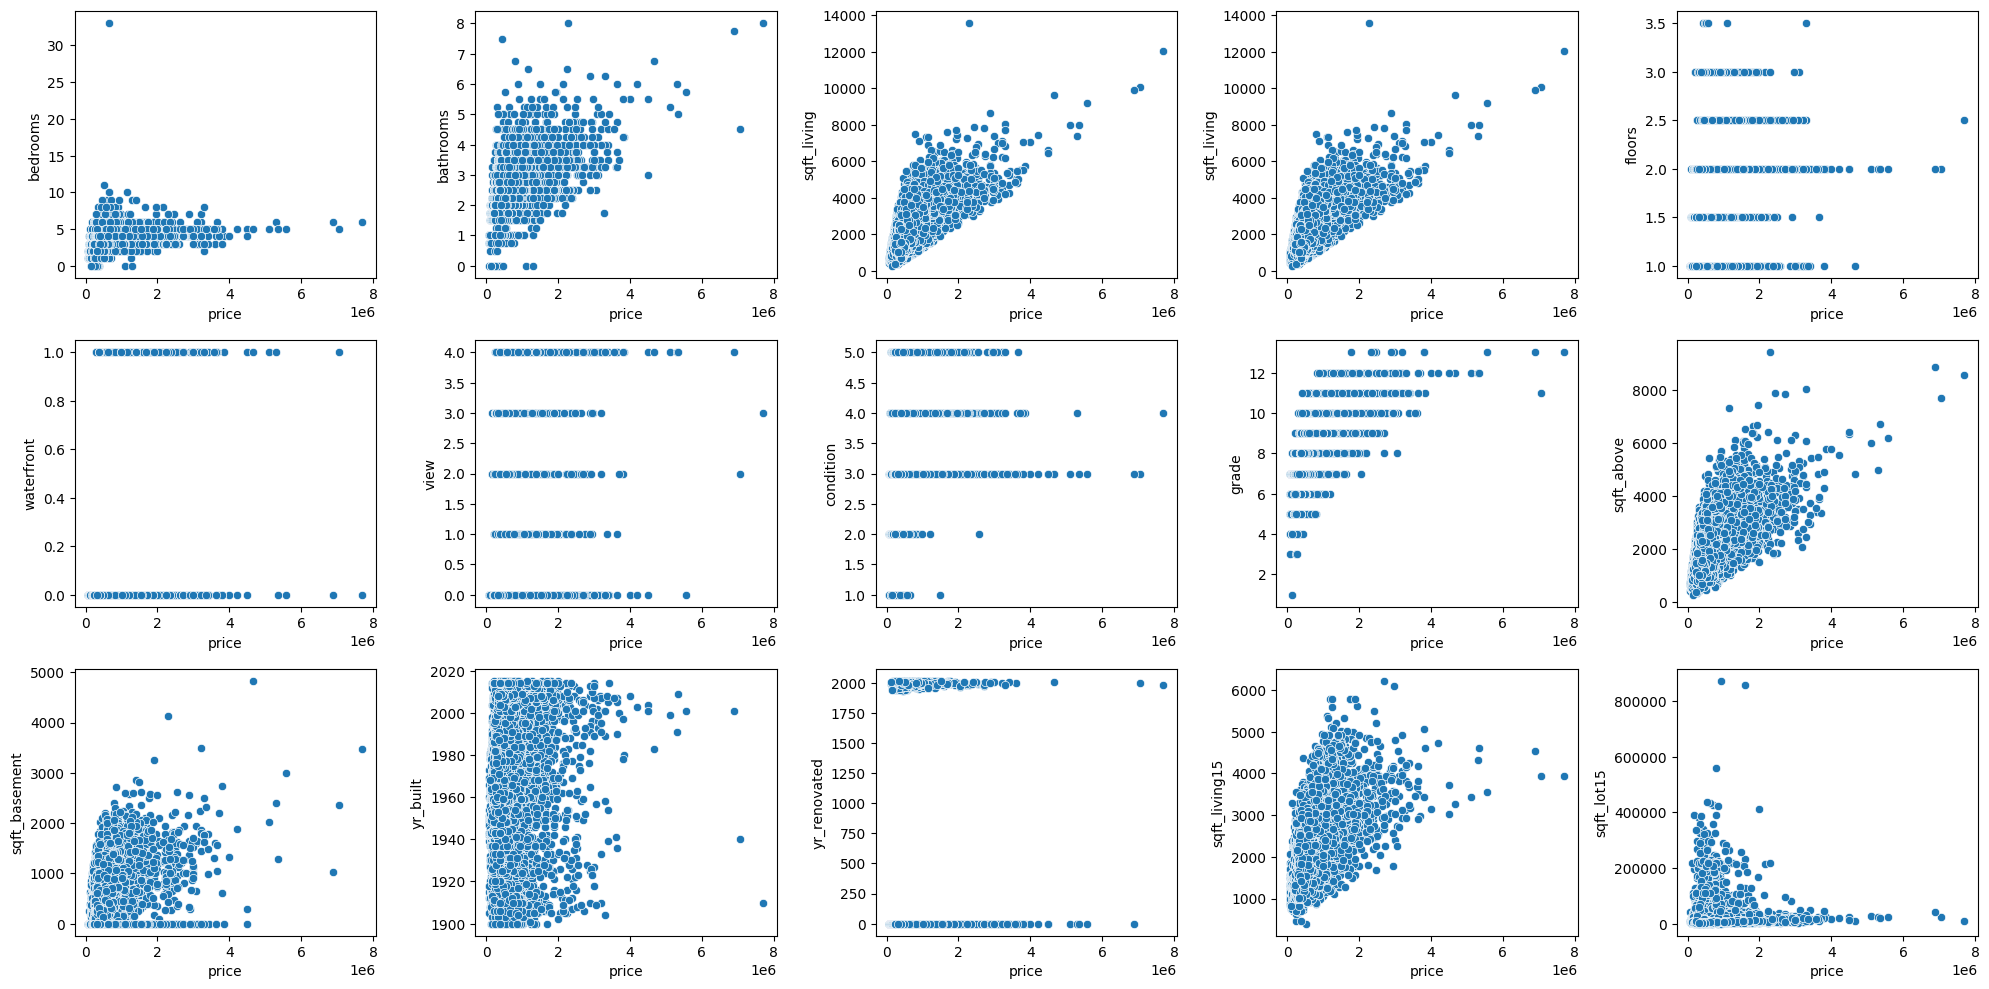

In [ ]:
y_vars = df1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living', 'floors','waterfront', 'view', 'condition', 'grade',
                         'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15' ]]
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

for i, var in enumerate(y_vars):
    row = i // 5
    col = i % 5
    sns.scatterplot(data=df1, x='price', y=var, ax=axes[row, col])
    # axes[row, col].set_xlabel(var)
    # axes[row, col].set_ylabel('price')

plt.tight_layout()

All numeric attributes are calculated the correlation with price, among which only zipcode has negative correlation. As 'lat' and 'long' are basically lattitue and longtitude of the house locations, they will not be used for the models as predeictors. 'Date' is also not included as it does not have much predictive power in regression models. In short, attributes - 'lat', 'long', 'zipcode', 'date' will be dropped from the dataframe.

In [ ]:
#Check correlation with price
corr = df1.corr()
corr.sort_values(['price'], ascending = False, inplace = True)
print(corr.price)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
zipcode         -0.053168
Name: price, dtype: float64


<ipython-input-11-dc5b7ee5ce63>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


In [ ]:
#drop 'lat','long','zipcode','date' from the df
df1.drop(['lat','long','zipcode','date'], axis = 1, inplace = True)

As price is right-skewed as shown in the above chart, all attributes will be calculated the skewness and then transformed as an attempt to return to normal distribution. It can be seen that except the attribute 'yr_built' , other attributes have skewness > 0.5, which means they are right-skewed. Thus, they will be log-transformed.   

In [ ]:
df1.skew()

price             4.021716
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

In [ ]:
skewed_attributes = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'floors','condition', 'grade', 'sqft_above', 'sqft_basement',
                     'view', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

# Apply log transformation to skewed attributes
for attribute in skewed_attributes:
    if df1[attribute].skew() > 0.5:
        df1[attribute] = np.log1p(df1[attribute])  # Apply log transformation


The dataset is split into 70% for training and 30% for testing with price as the label. The size of the training set is 15129 and 6484 for the validation (testing) set. The label is then extracted to new dataframes: df1_y_train and df1_y_valid for model evaluation.

In [ ]:
#Chose 'price' as the label
label_col = 'price'

In [ ]:
#Split the dataset to 70/30
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
df1_train, df1_valid = train_test_split(df1,
                                      test_size=valid_size,
                                      random_state=2023)

In [ ]:
# Extract the label to new dfs:df1_y_train and df1_y_valid
df1_y_train = df1_train[[label_col]]
df1_x_train = df1_train.drop(label_col, axis=1)
df1_y_valid = df1_valid[[label_col]]
df1_x_valid = df1_valid.drop(label_col, axis=1)

print('Size of training set: ', len(df1_x_train))
print('Size of validation set: ', len(df1_x_valid))

Size of training set:  15129
Size of validation set:  6484


The training and validation datasets will then be normalized to the range 0 -1 before feeding into the model in order to have faster covergence, and better performance.

In [ ]:
#Scale data to range 0-1
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df1_x_train)
df1_x_train = pd.DataFrame(scaler.transform(df1_x_train),
                            columns = df1_x_train.columns, index = df1_x_train.index)
df1_x_valid = pd.DataFrame(scaler.transform(df1_x_valid),
                            columns = df1_x_valid.columns, index = df1_x_valid.index)

print('X train min =', round(df1_x_train.min().min(),4), '; max =', round(df1_x_train.max().max(), 4))
print('X valid min =', round(df1_x_valid.min().min(),4), '; max =', round(df1_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.0189 ; max = 1.4191


In [ ]:
df1_x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7857000732,0.557886,0.21875,0.513540,0.309557,0.0,0.0,0.0,0.630930,0.712414,0.450033,0.772634,0.486957,0.0,0.546583,0.304148
1762600190,0.647685,0.31250,0.621975,0.577314,0.5,0.0,0.0,0.630930,0.876067,0.687073,0.000000,0.765217,0.0,0.757170,0.554994
4408100095,0.442114,0.12500,0.279439,0.307772,0.0,0.0,0.0,0.834044,0.712414,0.308686,0.000000,0.434783,0.0,0.369177,0.313015
7135520610,0.647685,0.43750,0.691475,0.410055,0.5,0.0,0.0,0.630930,0.920782,0.763847,0.000000,0.869565,0.0,0.852190,0.399955
8099900040,0.721057,0.43750,0.553842,0.374088,0.5,0.0,0.0,0.834044,0.712414,0.611809,0.000000,0.643478,0.0,0.587009,0.387838


Finally, all training and testing dataframe will be returned to Numpy for lesser memory consumption.

In [ ]:
arr_x_train = np.array(df1_x_train)
arr_y_train = np.array(df1_y_train)
arr_x_valid = np.array(df1_x_valid)
arr_y_valid = np.array(df1_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (15129, 15)
Training samples:  15129
Validation samples:  6484


<a id = "cell_model"></a>
## 3. Predictive Modeling A

###**Linear Regression (LR)**

In [ ]:
# Import LinearRegression class form Sklearn library
from sklearn.linear_model import LinearRegression


The LR model is first fitted on the training data and then made predictions based on the validation data. Two metrics used to evaluate its model are Mean Square Error (MSE) and Mean Absolute Error (MAE).

MSE measures the variance of the residuals. MAE measures the average of the residuals in the dataset. The lower they are, the better performance of the model is.

Based on the output, the MSE and MAE is 0.0958 and 0.2443 respectively. As both of them are low and MSE is near 0, it can be interpreted the model's accuracy is quite good. However, it is necessary to plot a chart to visualize the relationship between true values and predicted vallues, and calculate their correlation to verify this assumption.

In [ ]:
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(arr_x_train, arr_y_train)

# Make predictions on the validation data
predictions = lr_model.predict(arr_x_valid)

# Calculate the mean squared error
mse = mean_squared_error(arr_y_valid, predictions)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_y_valid, predictions)

# Print the mean squared error and mean absolute error
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.0958548668677798
Mean Absolute Error: 0.24434629637933084


Based on the below output, the correlation between true values and predicted values is 0.807 which is quite high. Moreover, the plot shows that even though there are some outliers, there is clearly a linear relationship between true values and predicted values.

In short, this LR model has good performance to predict the house prices.

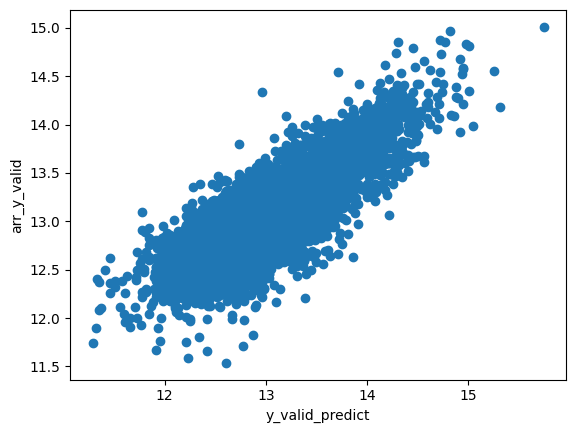

Correlation between True and Predicted Values: 0.807


In [ ]:
y_valid_predict = lr_model.predict(arr_x_valid)
# plot
plt.scatter(arr_y_valid, y_valid_predict)
plt.ylabel('arr_y_valid')
plt.xlabel('y_valid_predict')
plt.show()

correlation = np.corrcoef(arr_y_valid.flatten(), predictions.flatten())[0, 1]
print("Correlation between True and Predicted Values:", round(correlation,3))


###**Neural Networks (NN)**

The NN model are iterated with different architectures to validate which setting has the highest performance. It is found out that the NN model with 1 hidden layer outperformance the rest; thus, this section will mainly discuss about it.

In [ ]:
#Import modules and classes from TensorFlow's Keras
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop

**Model Architecture**

The NN model has 100 nodes in input layer with the activation Rectified Linear Unit (ReLU) which can introduce non-linear relationships into the model. This model has 15 features. The output layer is the price prediction numbers.

The model is compiled with MSE as loss function and the optimizer is RMSprop with specific hyperparameters:
* Learning rate: 0.001
* Rho: 0.9
* Epsilon: 1e-07
* Weight decay: 0.0

The metrics MAE is also calculated to assess the model's performance.  

**Summary of the model**
* Layer 1 (Input): This layer uses 100 nodes with 15 features. The parameters are 1,600 ((15+1)*100)
* Layer 2 (Output): This is the output layer with 1 node and 101 parameters (100*1 +1)

Total Parameters: 1,701

Trainable Parameters: 1,701

Non-trainable Parameters: 0

The MAE of this model is 0.22 while MSE is 0.08, indicating that this model has high predictive power. This fact is strengthend again with the high correlation 0.84 between predicted and true values.  The plots for MAE and MSE show a stable trend for both training and validation dataset.  


In [ ]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(x_size,)))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07, weight_decay=0.0),
        metrics=[metrics.mae])
    return(t_model)

In [ ]:
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dense(90, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0,),
        metrics=[metrics.mae])
    return(t_model)

In [ ]:
ann_model = basic_model_1(arr_x_train.shape[1], arr_y_train.shape[1])
ann_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1600      
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
random_seed = 29
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 20, verbose = 1)

In [ ]:
history = ann_model.fit(arr_x_train, arr_y_train,
    batch_size=32,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid))

Epoch 1/500
473/473 - 2s - loss: 18.4311 - mean_absolute_error: 2.5905 - val_loss: 0.4818 - val_mean_absolute_error: 0.5538 - 2s/epoch - 3ms/step
Epoch 2/500
473/473 - 1s - loss: 0.2949 - mean_absolute_error: 0.4233 - val_loss: 0.1955 - val_mean_absolute_error: 0.3451 - 762ms/epoch - 2ms/step
Epoch 3/500
473/473 - 1s - loss: 0.1647 - mean_absolute_error: 0.3163 - val_loss: 0.1336 - val_mean_absolute_error: 0.2841 - 618ms/epoch - 1ms/step
Epoch 4/500
473/473 - 1s - loss: 0.1257 - mean_absolute_error: 0.2772 - val_loss: 0.1136 - val_mean_absolute_error: 0.2621 - 670ms/epoch - 1ms/step
Epoch 5/500
473/473 - 1s - loss: 0.1140 - mean_absolute_error: 0.2651 - val_loss: 0.1086 - val_mean_absolute_error: 0.2568 - 781ms/epoch - 2ms/step
Epoch 6/500
473/473 - 1s - loss: 0.1080 - mean_absolute_error: 0.2580 - val_loss: 0.1009 - val_mean_absolute_error: 0.2477 - 908ms/epoch - 2ms/step
Epoch 7/500
473/473 - 1s - loss: 0.1049 - mean_absolute_error: 0.2548 - val_loss: 0.0978 - val_mean_absolute_error

In [ ]:
train_score = ann_model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = ann_model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val MAE: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))

Train MAE:  0.22 , Train Loss:  0.08
Val MAE:  0.22 , Val Loss:  0.08


203/203 [==============================] - 0s 1ms/step


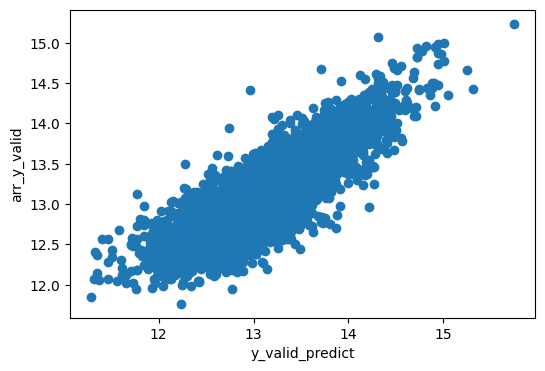

The Correlation between true and predicted values is:  0.84


In [ ]:
y_valid_predict = ann_model.predict(arr_x_valid)
# plot
plt.scatter(arr_y_valid, y_valid_predict)
plt.ylabel('arr_y_valid')
plt.xlabel('y_valid_predict')
plt.show()

corr_result = np.corrcoef(arr_y_valid.reshape(1,6484)[0], y_valid_predict.reshape(1,6484)[0])
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))

In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

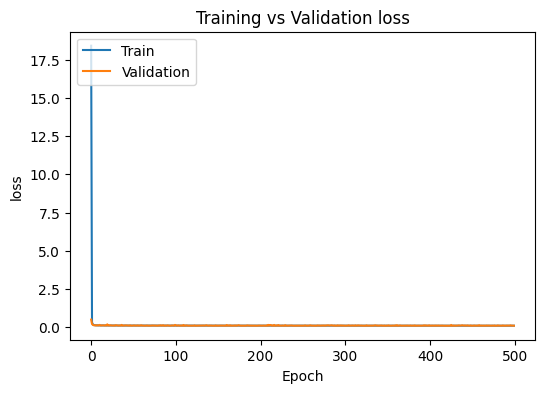

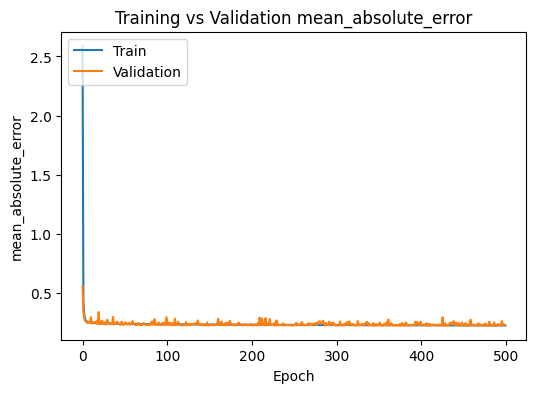

In [ ]:
hist = pd.DataFrame(history.history)

# Plot history
plot_hist(hist, xsize=6, ysize =4)

**CONCLUSION FOR SCENARIO A**

In short, NN model has better performance than LR model as both the MAE and MSE are lower while the correlation between predicted values and true values is higher. On the other hand, it is worth pointing out that the difference is not strikingly much.

 Model|MAE|MSE|Correlation
 -----|---|---|-----------
 Linear Regression|0.244|0.0958|0.807
 Neural Networks|0.22|0.08|0.84

<a id = "cell_model"></a>
## Data Preprocessing B


The data preprocessing steps are similar to scenario A, except in this task price attribute will be transform into nominal categories:
* High price for house of $450,000 or more

* Low price for house under $450,000
After transformation, one new attribute 'price_cat' will be created with value 1 and 0. 1 represents High price and 0 for Low price. The original 'price' attribute will be dropped from the dataset before training models. 'price_cat' is the target attribute.

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/A2_Datasets/Part1_house_price.csv')
df2.set_index('id', inplace=True)

In [ ]:
df2.drop(['lat','long','zipcode','date'], axis = 1, inplace = True)

In [ ]:
# Define the condition for categorizing price
conditions = [
    (df2['price'] >= 450000),
    (df2['price'] < 450000)
]

# Define the corresponding categories
categories = ['High price', 'Low price']

# Use pd.cut to categorize the "price" column
df2['price'] = pd.cut(df2['price'], bins=[-float("inf"), 449999, float("inf")], labels=categories)
df2['price_cat'] = df2['price'].apply(lambda x: 1 if x == 'High price' else 0)

In [ ]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price_cat
id,,,,,,,,,,,,,,,,,
7129300520,High price,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,1
6414100192,Low price,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,0
5631500400,High price,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,1
2487200875,Low price,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0
1954400510,Low price,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0


In [ ]:
# Drop the original "price" column
df2.drop(columns=['price'], inplace=True)

In [ ]:
skewed_attributes = [ 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'floors','condition', 'grade', 'sqft_above', 'sqft_basement',
                     'view', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

# Apply log transformation to skewed attributes
for attribute in skewed_attributes:
    if df2[attribute].skew() > 0.5:
        df2[attribute] = np.log1p(df2[attribute])  # Apply log transformation


In [ ]:
#Chose 'price' as the target
label_col = 'price_cat'

In [ ]:
#Split the dataset to 70/30
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
df2_train, df2_valid = train_test_split(df2,
                                      test_size=valid_size,
                                      random_state=2023)

In [ ]:
# Extract the label to new dfs:df2_y_train and df2_y_valid
df2_y_train = df2_train[[label_col]]
df2_x_train = df2_train.drop(label_col, axis=1)
df2_y_valid = df2_valid[[label_col]]
df2_x_valid = df2_valid.drop(label_col, axis=1)

print('Size of training set: ', len(df2_x_train))
print('Size of validation set: ', len(df2_x_valid))

Size of training set:  15129
Size of validation set:  6484


In [ ]:
#Scale data to range 0-1
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df2_x_train)
df2_x_train = pd.DataFrame(scaler.transform(df2_x_train),
                            columns = df2_x_train.columns, index = df2_x_train.index)
df2_x_valid = pd.DataFrame(scaler.transform(df2_x_valid),
                            columns = df2_x_valid.columns, index = df2_x_valid.index)

print('X train min =', round(df2_x_train.min().min(),4), '; max =', round(df2_x_train.max().max(), 4))
print('X valid min =', round(df2_x_valid.min().min(),4), '; max =', round(df2_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.0189 ; max = 1.4191


In [ ]:
df2_x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7857000732,0.557886,0.21875,0.513540,0.309557,0.0,0.0,0.0,0.630930,0.712414,0.450033,0.772634,0.486957,0.0,0.546583,0.304148
1762600190,0.647685,0.31250,0.621975,0.577314,0.5,0.0,0.0,0.630930,0.876067,0.687073,0.000000,0.765217,0.0,0.757170,0.554994
4408100095,0.442114,0.12500,0.279439,0.307772,0.0,0.0,0.0,0.834044,0.712414,0.308686,0.000000,0.434783,0.0,0.369177,0.313015
7135520610,0.647685,0.43750,0.691475,0.410055,0.5,0.0,0.0,0.630930,0.920782,0.763847,0.000000,0.869565,0.0,0.852190,0.399955
8099900040,0.721057,0.43750,0.553842,0.374088,0.5,0.0,0.0,0.834044,0.712414,0.611809,0.000000,0.643478,0.0,0.587009,0.387838


In [ ]:
arr2_x_train = np.array(df2_x_train)
arr2_y_train = np.array(df2_y_train)
arr2_x_valid = np.array(df2_x_valid)
arr2_y_valid = np.array(df2_y_valid)

print('Training shape:', arr2_x_train.shape)
print('Training samples: ', arr2_x_train.shape[0])
print('Validation samples: ', arr2_x_valid.shape[0])

Training shape: (15129, 15)
Training samples:  15129
Validation samples:  6484


<a id = "cell_model"></a>
## Predictive Modeling B

###**Random Forest (RF)**

**Model Architecture**

 The RF model with 100 decision trees is used in this scenario with the random seed of 29.

**Model Evaluation**

The model kappa score is 0.646 and the accuracy is 0.823. In terms of classification, the model is performing quite good for both 1 and 0 classes, each with 0.82 precision. For recall, class 0 is slightly better than class 1, or the model will find low price houses better than the other counterparts.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score


# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=29)
rf_classifier.fit(arr2_x_train, arr2_y_train)

# Make predictions on the validation set
arr2_y_pred = rf_classifier.predict(arr2_x_valid)

# Calculate Cohen's Kappa score
kappa_score = cohen_kappa_score(arr2_y_valid, arr2_y_pred)

# Display the Kappa score
print("Cohen's Kappa Score:", kappa_score)

# Evaluate the model's accuracy
accuracy = accuracy_score(arr2_y_valid, arr2_y_pred)
print("Accuracy:", accuracy)

# Display a classification report
class_report = classification_report(arr2_y_valid, arr2_y_pred)
print("Classification Report:\n", class_report)

<ipython-input-19-bbb4564e2e57>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(arr2_x_train, arr2_y_train)


Cohen's Kappa Score: 0.6462040259915224
Accuracy: 0.8231030228254164
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      3245
           1       0.82      0.82      0.82      3239

    accuracy                           0.82      6484
   macro avg       0.82      0.82      0.82      6484
weighted avg       0.82      0.82      0.82      6484



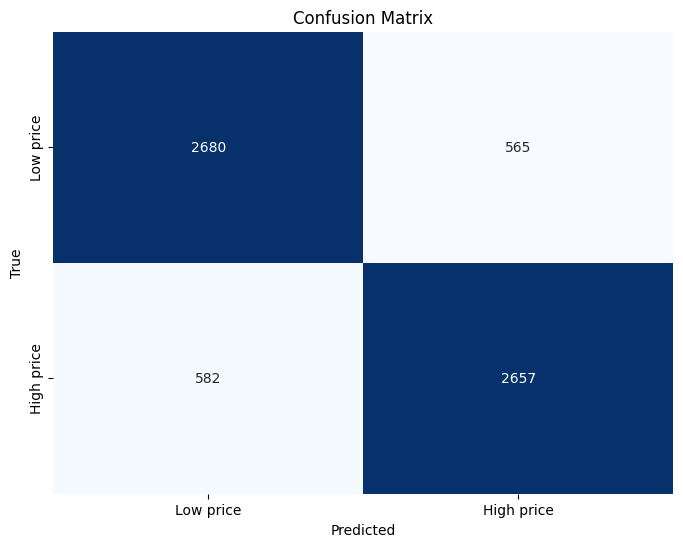

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(arr2_y_valid, arr2_y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Low price", "High price"], yticklabels=["Low price", "High price"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

###**Neural Networks (NN)**

**Model Architecture**

The NN model has 100 nodes in input layer with the activation Rectified Linear Unit (ReLU) which can introduce non-linear relationships into the model. This model has 15 features. The output layer has 2 nodes to predict the price classification: 1 or 0 with the activation softmax which is typically used for multi-class classification problems.

The model is compiled with categorical crossentropy as loss function and the optimizer is Nadam with the learning rate at 0.002.


The metrics used to assess the model's performance are accuracy and kappa as well as classification report.

**Summary of the model**
* Layer 1 (Input): This layer uses 100 nodes with 15 features. The parameters are 1,600
* Layer 2 (Output): This is the output layer with 2 node and 202 parameters

Total Parameters: 1,802

Trainable Parameters: 1,802

Non-trainable Parameters: 0

**Model Evaluation**

The accuracy of this model is 0.82 while kappa is 0.635, indicating that this model has good predictive power. In terms of classification, the model is performing quite good for both 1 and 0 classes, with 0.84 precision for class 0 and 0.80 for class 1. For recall, class 1 is better than class 0 (0.85 and 0.78 respectively), or the model will find high price houses better than the other counterparts.   

In [ ]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Nadam, RMSprop
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
from tensorflow.keras.utils import to_categorical
# convert class vectors to binary class matrices
arr2_y_train = to_categorical(arr2_y_train, 2)
arr2_y_valid = to_categorical(arr2_y_valid, 2)

print('Train shape: x=', arr2_x_train.shape, ', y=', arr2_y_train.shape)
print('Test shape: x=', arr2_x_valid.shape, ', y=', arr2_y_valid.shape)

Train shape: x= (15129, 15) , y= (15129, 2)
Test shape: x= (6484, 15) , y= (6484, 2)


In [ ]:
def basic_model_1():
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(15,)))
    t_model.add(Dense(2, activation='softmax'))
    t_model.summary()
    return(t_model)

In [ ]:
def basic_model_2():
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(15,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dense(90, activation="relu"))
    t_model.add(Dense(2, activation='softmax'))
    t_model.summary()

    return(t_model)

In [ ]:
nn_model_2 = basic_model_1()
nn_model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 100)               1600      
                                                                 
 dense_35 (Dense)            (None, 2)                 202       
                                                                 
Total params: 1,802
Trainable params: 1,802
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 100)               1600      
                                                                 
 dense_35 (Dense)            (None, 2)                 202       
                                                                 
Total params: 1,802
Trainabl

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 20, verbose = 1)

In [ ]:
random_seed = 29
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [ ]:
nn_model_2.compile(optimizer=Nadam(learning_rate=0.002),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

history = nn_model_2.fit(arr2_x_train, arr2_y_train,
    batch_size=32,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_data=(arr2_x_valid, arr2_y_valid))

Epoch 1/100
473/473 - 4s - loss: 0.5382 - accuracy: 0.7234 - val_loss: 0.4933 - val_accuracy: 0.7478 - 4s/epoch - 9ms/step
Epoch 2/100
473/473 - 2s - loss: 0.4776 - accuracy: 0.7647 - val_loss: 0.4578 - val_accuracy: 0.7830 - 2s/epoch - 4ms/step
Epoch 3/100
473/473 - 1s - loss: 0.4635 - accuracy: 0.7730 - val_loss: 0.4495 - val_accuracy: 0.7852 - 1s/epoch - 3ms/step
Epoch 4/100
473/473 - 2s - loss: 0.4538 - accuracy: 0.7793 - val_loss: 0.4392 - val_accuracy: 0.7913 - 2s/epoch - 4ms/step
Epoch 5/100
473/473 - 4s - loss: 0.4462 - accuracy: 0.7849 - val_loss: 0.4317 - val_accuracy: 0.7963 - 4s/epoch - 9ms/step
Epoch 6/100
473/473 - 2s - loss: 0.4403 - accuracy: 0.7884 - val_loss: 0.4291 - val_accuracy: 0.7980 - 2s/epoch - 4ms/step
Epoch 7/100
473/473 - 1s - loss: 0.4357 - accuracy: 0.7903 - val_loss: 0.4346 - val_accuracy: 0.7910 - 1s/epoch - 2ms/step
Epoch 8/100
473/473 - 1s - loss: 0.4333 - accuracy: 0.7919 - val_loss: 0.4188 - val_accuracy: 0.8061 - 1s/epoch - 2ms/step
Epoch 9/100
473/

In [ ]:
train_score = nn_model_2.evaluate(arr2_x_train, arr2_y_train, verbose=0)
valid_score = nn_model_2.evaluate(arr2_x_valid, arr2_y_valid, verbose=0)

print('Train Accuracy: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val Accuracy: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))

Train Accuracy:  0.81 , Train Loss:  0.39
Val Accuracy:  0.82 , Val Loss:  0.39


In [ ]:
# Make predictions on the test set
y_pred = nn_model_2.predict(arr2_x_valid)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
arr2_y_valid = np.argmax(arr2_y_valid, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(arr2_y_valid, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(arr2_y_valid, y_pred_multiclass)

# Print the report
print("The result of the classification report is: \n ",report)

203/203 [==============================] - 1s 2ms/step
The result of Kappa is : 0.635
The result of the classification report is: 
                precision    recall  f1-score   support

           0       0.84      0.78      0.81      3245
           1       0.80      0.85      0.82      3239

    accuracy                           0.82      6484
   macro avg       0.82      0.82      0.82      6484
weighted avg       0.82      0.82      0.82      6484



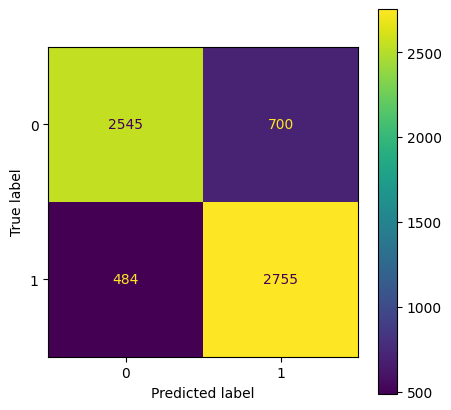

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(
    arr2_y_valid,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm)

# Create a figure with a fixed size
fig = plt.figure(figsize=(5, 5))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

**CONCLUSION FOR SCENARIO B**

In summary, RF model has better performance than NN model in this scenario as the kappa score is higher although not much.

 Model|Accuracy|Kappa
 -----|---|---|
 Random Forest|0.823|0.646
 Neural Networks|0.82|0.635


<a id = "cell_report"></a>
## 4. Experiments Report

**Scenario A**

It can be seen from the below table that in the NN model, smaller batch sizes impacts its performance most. Different layers in the model also has impact but not as much as the batch sizes. However, the iterations in this scenario has not touched on different optimizers. Thus, the model can be further optimized by changing parameters such as different optimizers with different hyperparameters.  



Model | MAE | MSE
------|-------------------------------|-----
1 hidden layer, 64 batches, 500 epochs|0.24 | 0.1
1 hidden layer, 32 batches, 500 epochs|0.22 | 0.08
3 hidden layers, 64 batches, 500 epochs| 0.23 |0.09
3 hidden layers, 32 batches, 500 epochs|0.23 | 0.08

**Scenario B**

The table below again reveals that the smaller batch sizes the better the model. Optimizers wiare also affect the performance with Nadam is being superior than RMSprop. The learning rate also plays an important role in improving model's performance.  

Model | Optimizer| Learning rate| Accuracy | Kappa |
------|----------|--------------|-----------|------|
1 layer, 32 batches, epoch 100 |Nadam|0.002|0.82|0.635|
1 layer, 32 batches, epoch 100 |Nadam|0.005|0.81|0.628|
1 layer, 64 batches, epoch 100 |Nadam|0.002|0.81|0.628|
1 layer, 64 batches, epoch 100 |Nadam|0.005|0.82 |0.63|
1 layer, 128 batches, epoch 100 |Nadam|0.002|0.81 |0.624|
1 layer, 64 batches, epoch 100 |RMSprop|0.002|0.82 |0.615|
1 layer, 64 batches, epoch 100 |RMSprop|0.005|0.82 |0.593|
2 layers, 32 batches, epoch 100 |Nadam| 0.002|0.81|0.63
2 layers, 64 batches, epoch 100 |Nadam| 0.002|0.81|0.615

The NN model's performance is better than LR in the first scenario as it could capture non-linearity data which LR cannot. On the other hand, RF model in the second scenario has higher kappa due to its indifference to outliers which even after log transformation still exist in this dataset. Thus, beside changing hyperparameters in optimizers, handling outliers is another way to improve NN model. Parameters such as batch sizes, activation functions, weight initialzation also could be tuned to improve its performance.

The proposed models could help real estate companies to predict house prices if there is new propery appearing in the market. As a business, companies would like make a good investment decision whether to buy or sell. Thus, the models here could help them to do so through prediction. They can also be utilized if real estate companies offering consultant to customers in helping them to purchase or put up their properties on the market with the reasonable costs or highest returns.
